# 第 10 章第 2 节- 手动实现 PCA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## PCA 算法模拟

In [2]:
A = np.array([[3, 2000], 
              [2, 3000], 
              [4, 5000], 
              [5, 8000], 
              [1, 2000]], dtype='float')

# 去均值
mean = np.mean(A, axis=0)
norm = A - mean
# 数据缩放
scope = np.max(norm, axis=0) - np.min(norm, axis=0)
norm = norm / scope
norm

array([[ 0.        , -0.33333333],
       [-0.25      , -0.16666667],
       [ 0.25      ,  0.16666667],
       [ 0.5       ,  0.66666667],
       [-0.5       , -0.33333333]])

liwei 注：这部分书上写错了，使用 SVD 应该直接对去均值以后的矩阵做 SVD 分解，而不是对协方差矩阵做 SVD。

+ 用 SVD 就是为了避免计算协方差矩阵，计算协方差矩阵是一个消耗很大的工作，SVD 其它高效算法避开了这一点；
+ 对于一个对称矩阵（方阵）作 SVD 分解，实际上就是与特征分解没有实质性差别。

In [3]:
U, S, VT = np.linalg.svd(norm)
U

array([[ 0.21861503, -0.75974171, -0.22308683,  0.35519197,  0.44617366],
       [ 0.26017368,  0.23939436,  0.16243237,  0.86202009, -0.32486473],
       [-0.26017368, -0.23939436,  0.92172121,  0.03032723,  0.15655759],
       [-0.73896239,  0.280953  , -0.22308683,  0.35519197,  0.44617366],
       [ 0.52034736,  0.47878871,  0.15655759, -0.06065446,  0.68688482]])

In [4]:
S

array([1.12203672, 0.29707881])

In [5]:
VT

array([[-0.67710949, -0.73588229],
       [-0.73588229,  0.67710949]])

In [6]:
V_reduce = VT.T[:, 0].reshape(2,1)
V_reduce

array([[-0.67710949],
       [-0.73588229]])

In [7]:
R = np.dot(norm, V_reduce)
R

array([[ 0.2452941 ],
       [ 0.29192442],
       [-0.29192442],
       [-0.82914294],
       [ 0.58384884]])

In [8]:
Z = np.dot(R, V_reduce.T)
Z

array([[-0.16609096, -0.18050758],
       [-0.19766479, -0.21482201],
       [ 0.19766479,  0.21482201],
       [ 0.56142055,  0.6101516 ],
       [-0.39532959, -0.42964402]])

In [9]:
np.multiply(Z, scope) + mean

array([[2.33563616e+00, 2.91695452e+03],
       [2.20934082e+00, 2.71106794e+03],
       [3.79065918e+00, 5.28893206e+03],
       [5.24568220e+00, 7.66090960e+03],
       [1.41868164e+00, 1.42213588e+03]])

In [10]:
A

array([[3.e+00, 2.e+03],
       [2.e+00, 3.e+03],
       [4.e+00, 5.e+03],
       [5.e+00, 8.e+03],
       [1.e+00, 2.e+03]])

## 使用 sklearn 包实现

In [11]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def std_PCA(**argv):
    scaler = MinMaxScaler()
    pca = PCA(**argv)
    pipeline = Pipeline([('scaler', scaler),
                         ('pca', pca)])
    return pipeline

pca = std_PCA(n_components=1)
R2 = pca.fit_transform(A)
R2

array([[-0.2452941 ],
       [-0.29192442],
       [ 0.29192442],
       [ 0.82914294],
       [-0.58384884]])

In [12]:
pca.inverse_transform(R2)

array([[2.33563616e+00, 2.91695452e+03],
       [2.20934082e+00, 2.71106794e+03],
       [3.79065918e+00, 5.28893206e+03],
       [5.24568220e+00, 7.66090960e+03],
       [1.41868164e+00, 1.42213588e+03]])

## 降维及恢复示意图

NameError: name 'U_reduce' is not defined

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


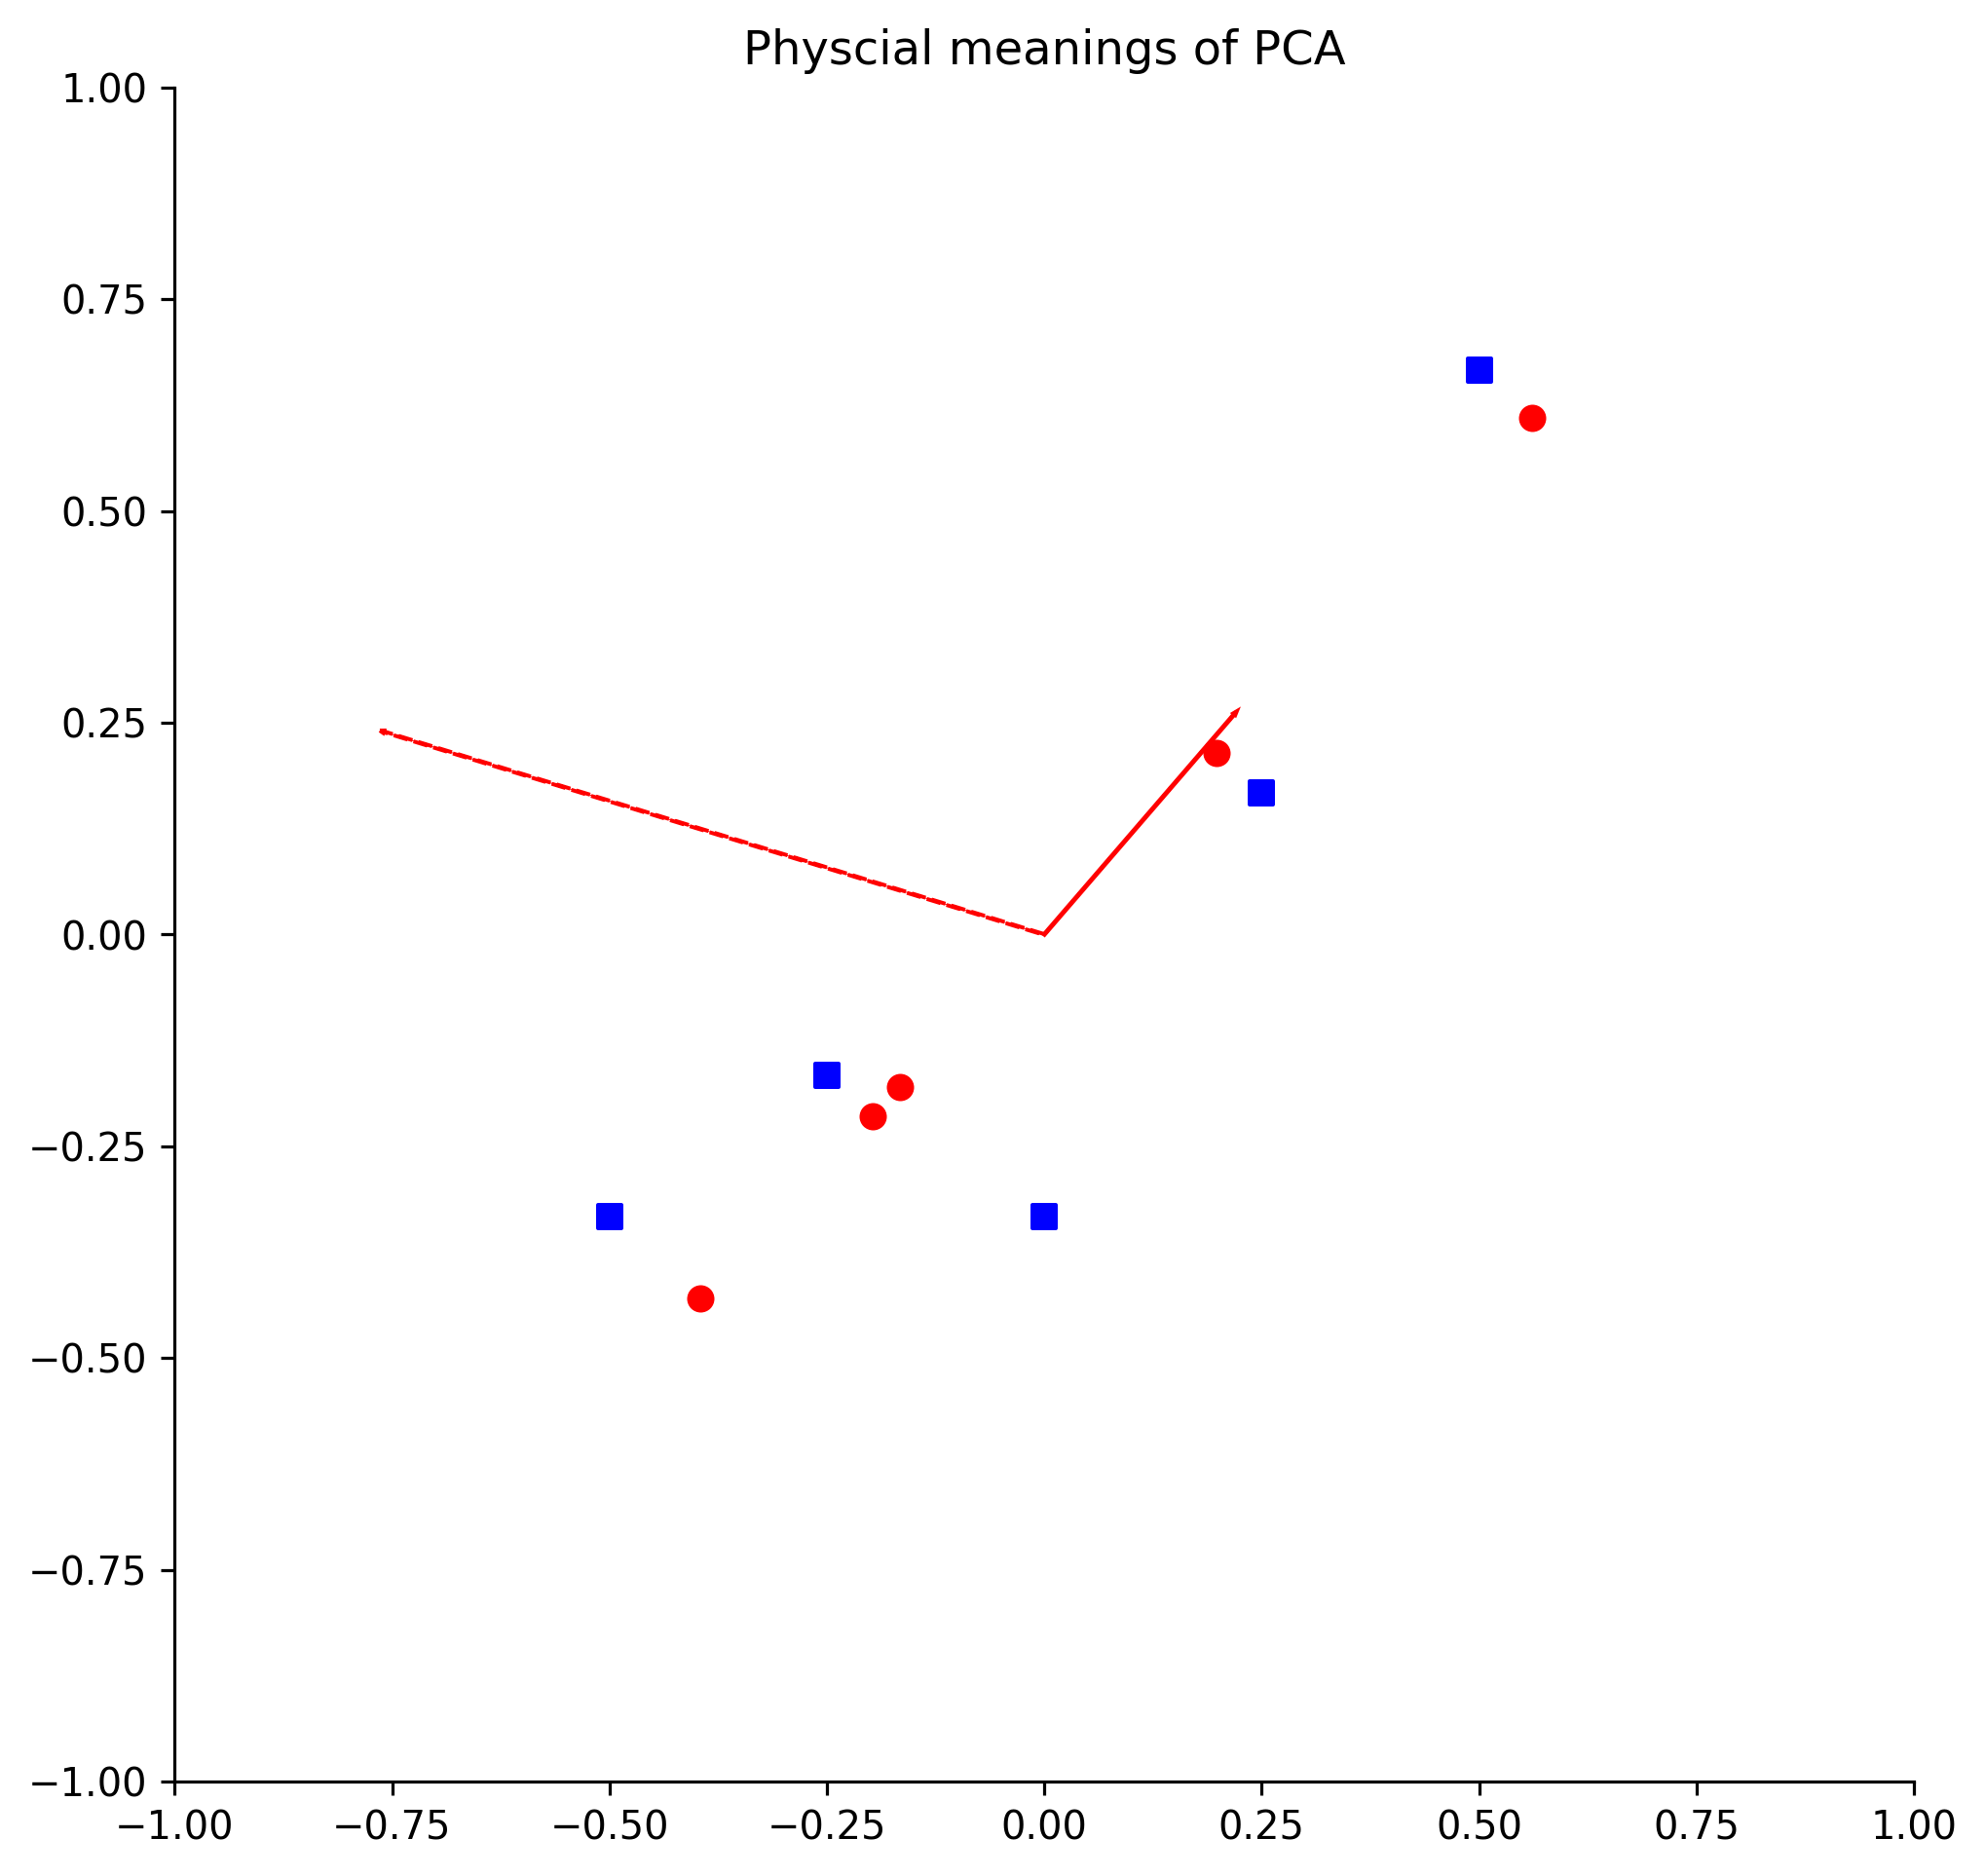

In [13]:
plt.figure(figsize=(8, 8), dpi=144)

plt.title('Physcial meanings of PCA')

ymin = xmin = -1
ymax = xmax = 1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(norm[:, 0], norm[:, 1], marker='s', c='b')
plt.scatter(Z[:, 0], Z[:, 1], marker='o', c='r')
plt.arrow(0, 0, U[0][0], U[1][0], color='r', linestyle='-')
plt.arrow(0, 0, U[0][1], U[1][1], color='r', linestyle='--')
plt.annotate(r'$U_{reduce} = u^{(1)}$',
             xy=(U[0][0], U[1][0]), xycoords='data',
             xytext=(U_reduce[0][0] + 0.2, U_reduce[1][0] - 0.1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$u^{(2)}$',
             xy=(U[0][1], U[1][1]), xycoords='data',
             xytext=(U[0][1] + 0.2, U[1][1] - 0.1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'raw data',
             xy=(norm[0][0], norm[0][1]), xycoords='data',
             xytext=(norm[0][0] + 0.2, norm[0][1] - 0.2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'projected data',
             xy=(Z[0][0], Z[0][1]), xycoords='data',
             xytext=(Z[0][0] + 0.2, Z[0][1] - 0.1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))